# HW4 on Data Science course of Sharif University of Technology
## Created by: Mohammad Mahdi Hossein Beiky     SI: 400100995
## GitHub URL: https://github.com/Mmhb1382/Data_Science_HW4.git
---

### Import python packages here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression


In [2]:
df = pd.read_csv('AmesHousing.csv')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## EDA: let's see what's going on in this dataset and detect how many NaN values we have.

In [3]:
# Basic dataset overview
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("\nTotal Duplicated Rows:", df.duplicated().sum())

# Summary statistics for numerical features
print("\nNumerical Features Summary:")
print(df.describe())

# Summary statistics for categorical features
print("\nCategorical Features Summary:")
print(df.describe(include=["object"]))

# Checking missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("\nMissing Values Per Column:")
print(missing_values)

Dataset Shape: (2930, 82)

Columns: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Gara

## Data Cleaning: after we found the missing values, we must decide how to behave.
first we needed to replace the spaces in between column names with underscores to have one word name. then in the data cleaning part, we had this logic to replace some of NaN's with none because they are of object dtype and also some of them filled with 0 because of being numerical.

In [4]:
def clean_column_names(df):
    """
    Removes spaces from column names by replacing them with underscores.

    Parameters:
        df (pd.DataFrame): The input dataset.

    Returns:
        pd.DataFrame: The dataset with cleaned column names.
    """
    df = df.copy()
    df.columns = df.columns.str.replace(' ', '_')
    return df

def clean_data(df):
    """
    Cleans the given dataset by handling missing values, removing outliers, and dropping duplicates.

    Parameters:
        df (pd.DataFrame): The input dataset.

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    df = df.copy()  # Avoid modifying the original dataset
    df = clean_column_names(df)  # Clean column names

    # Handling missing values

    # Categorical columns with missing values replaced by 'None'
    none_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu",
                 "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                 "BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1"]

    for col in none_cols:
        if col in df.columns:
            df[col] = df[col].fillna("None")

    # Numerical columns where NaN indicates "No Feature" → Fill with 0
    zero_cols = ["GarageYrBlt", "MasVnrArea"]

    for col in zero_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # LotFrontage - Fill with median per neighborhood
    if "LotFrontage" in df.columns and "Neighborhood" in df.columns:
        df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median() if not x.dropna().empty else 0))

    # Electrical - Fill with mode (most common value)
    if "Electrical" in df.columns:
        if not df["Electrical"].dropna().empty:
            df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

    # Removing outliers using IQR
    numerical_cols = df.select_dtypes(include=[np.number]).columns

    for col in numerical_cols:
        if not df[col].dropna().empty:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Removing duplicate rows
    df = df.drop_duplicates()

    return df

# Apply the function to clean the dataset
df_cleaned = clean_data(df)
df_cleaned

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
4,5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,None,IR1,Lvl,...,0,NaN,None,NaN,0,6,2010,WD,Normal,195500
8,9,527146030,120,RL,39.0,5389,Pave,None,IR1,Lvl,...,0,NaN,None,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,None,Reg,Lvl,...,0,NaN,None,NaN,0,6,2010,WD,Normal,189000
10,11,527163010,60,RL,75.0,10000,Pave,None,IR1,Lvl,...,0,NaN,None,NaN,0,4,2010,WD,Normal,175900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2901,916477010,20,RL,95.0,13618,Pave,None,Reg,Lvl,...,0,NaN,None,NaN,0,11,2006,New,Partial,320000
2905,2906,923203090,120,RM,32.0,4500,Pave,None,Reg,Lvl,...,0,NaN,None,NaN,0,5,2006,WD,Normal,164000
2911,2912,923225510,20,RL,58.0,10172,Pave,None,IR1,Lvl,...,0,NaN,None,NaN,0,10,2006,WD,Normal,126500
2925,2926,923275080,80,RL,37.0,7937,Pave,None,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500


## Feature Engineering: we should find out which columns have the best correlation or mutual information with SalePrice column

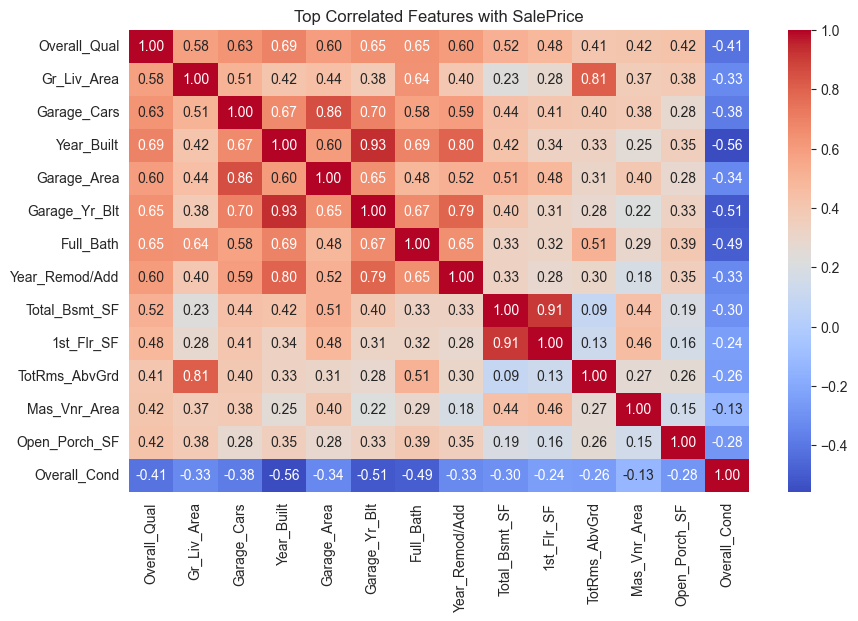

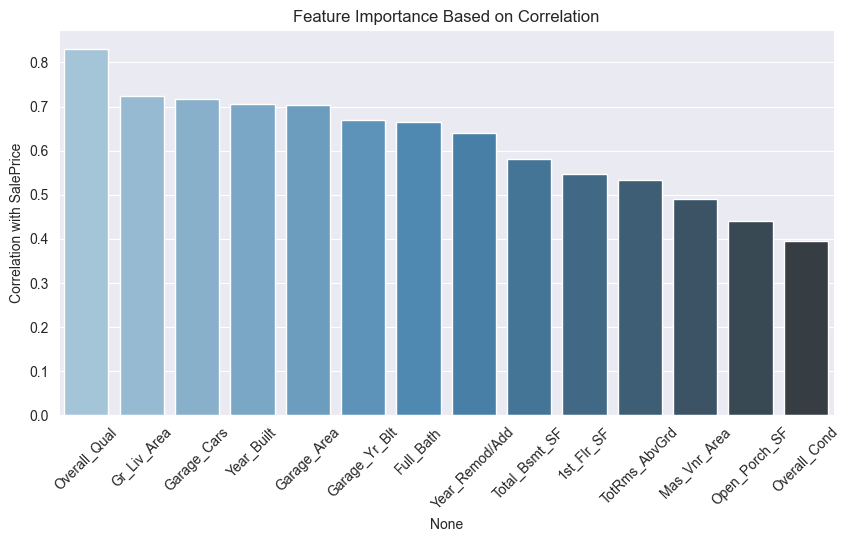

Overall_Qual      0.831094
Gr_Liv_Area       0.724245
Garage_Cars       0.717507
Year_Built        0.705330
Garage_Area       0.703422
Garage_Yr_Blt     0.669893
Full_Bath         0.665367
Year_Remod/Add    0.639692
Total_Bsmt_SF     0.580778
1st_Flr_SF        0.547298
TotRms_AbvGrd     0.534539
Mas_Vnr_Area      0.490517
Open_Porch_SF     0.440595
Overall_Cond      0.395463
Name: SalePrice, dtype: float64

In [5]:
# Function to analyze correlations
def analyze_correlations(df):
    """
    Computes and visualizes correlations between SalePrice and other numerical variables.

    Parameters:
        df (pd.DataFrame): The input dataset.

    Returns:
        None (Displays correlation heatmap and bar plots)
    """
    df = df.copy()

    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=[np.number])

    # Compute correlation matrix
    correlation_matrix = numerical_cols.corr()

    # Select top correlated features with SalePrice
    saleprice_correlation = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)
    top_features = saleprice_correlation[1:15]  # Exclude SalePrice itself

    # Heatmap for top correlated features
    plt.figure(figsize=(10, 6))
    sns.heatmap(numerical_cols[top_features.index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Top Correlated Features with SalePrice")
    plt.show()

    # Bar plot for correlation values
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_features.index, y=top_features.values, hue=top_features.index, palette="Blues_d", dodge=False, legend=False)
    plt.xticks(rotation=45)
    plt.ylabel("Correlation with SalePrice")
    plt.title("Feature Importance Based on Correlation")
    plt.show()

    return top_features

# Apply correlation analysis
top_correlated_features = analyze_correlations(df_cleaned)

# Display top correlated features
top_correlated_features

## Feature Addition: now we're going to create some of the features, we're assigned to create.

In [6]:
# Function to create new features based on different types of transformations
def feature_engineering(df):
    """
    Performs feature engineering on the dataset by creating ratio, binning, date/time,
    and aggregation-based features.

    Parameters:
        df (pd.DataFrame): The input dataset.

    Returns:
        pd.DataFrame: The dataset with new features added.
    """
    df = df.copy()

    # Ratio Features
    df['Living_Area_Ratio'] = df['Gr_Liv_Area'] / df['Lot_Area']
    df['Basement_Area_Ratio'] = df['Total_Bsmt_SF'] / df['Lot_Area']
    df['Garage_Area_Ratio'] = df['Garage_Area'] / df['Lot_Area']

    # Binning Features
    df['House_Age_Binned'] = pd.cut(df['Yr_Sold'] - df['Year_Built'], bins=[0, 10, 30, 60, 100, 200], labels=["New", "Recent", "Moderate", "Old", "Very_Old"])
    df['Living_Area_Binned'] = pd.qcut(df['Gr_Liv_Area'], q=4, labels=["Small", "Medium", "Large", "Very_Large"])

    # Date/Time Features
    df['Age_at_Sale'] = df['Yr_Sold'] - df['Year_Built']
    df['Years_Since_Remodel'] = df['Yr_Sold'] - df['Year_Remod/Add']
    df['Garage_Age'] = df['Yr_Sold'] - df['Garage_Yr_Blt']

    # Aggregation Features
    df['Total_Bathrooms'] = df['Full_Bath'] + (0.5 * df['Half_Bath']) + df['Bsmt_Full_Bath'] + (0.5 * df['Bsmt_Half_Bath'])
    df['Total_Porch_SF'] = df['Wood_Deck_SF'] + df['Open_Porch_SF'] + df['Enclosed_Porch'] + df['3Ssn_Porch'] + df['Screen_Porch']
    df['Total_SF'] = df['Total_Bsmt_SF'] + df['1st_Flr_SF'] + df['2nd_Flr_SF']

    # Binary Features
    df['Has_Garage'] = np.where(df['Garage_Area'] > 0, 1, 0)
    df['Has_Basement'] = np.where(df['Total_Bsmt_SF'] > 0, 1, 0)
    df['Has_Fireplace'] = np.where(df['Fireplaces'] > 0, 1, 0)

    # Log transformation for skewed numerical features
    skewed_features = ['Gr_Liv_Area', 'Total_SF', 'Garage_Area', 'Total_Bsmt_SF']
    for col in skewed_features:
        df[col] = np.log1p(df[col])  # log1p avoids log(0) issues

    return df

# Apply feature engineering to the dataset
df_engineered = feature_engineering(df_cleaned)
df_engineered

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Living_Area_Binned,Age_at_Sale,Years_Since_Remodel,Garage_Age,Total_Bathrooms,Total_Porch_SF,Total_SF,Has_Garage,Has_Basement,Has_Fireplace
4,5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,...,Large,13,12,13.0,2.5,246,7.846981,1,1,1
5,6,527105030,60,RL,78.0,9978,Pave,None,IR1,Lvl,...,Large,12,12,12.0,2.5,396,7.836370,1,1,1
8,9,527146030,120,RL,39.0,5389,Pave,None,IR1,Lvl,...,Large,15,14,15.0,3.0,389,8.074649,1,1,1
9,10,527162130,60,RL,60.0,7500,Pave,None,Reg,Lvl,...,Very_Large,11,11,11.0,2.5,200,7.937017,1,1,1
10,11,527163010,60,RL,75.0,10000,Pave,None,IR1,Lvl,...,Large,17,16,17.0,2.5,241,7.791110,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2901,916477010,20,RL,95.0,13618,Pave,None,Reg,Lvl,...,Very_Large,1,0,1.0,3.0,210,8.213111,1,1,1
2905,2906,923203090,120,RM,32.0,4500,Pave,None,Reg,Lvl,...,Medium,8,8,8.0,3.0,125,7.796880,1,1,0
2911,2912,923225510,20,RL,58.0,10172,Pave,None,IR1,Lvl,...,Small,38,3,38.0,2.0,120,7.461066,1,1,0
2925,2926,923275080,80,RL,37.0,7937,Pave,None,IR1,Lvl,...,Small,22,22,22.0,2.0,120,7.604396,1,1,0


## Feature Selection: now we use mutual information to chose which column has the best information for us to predict the house price.

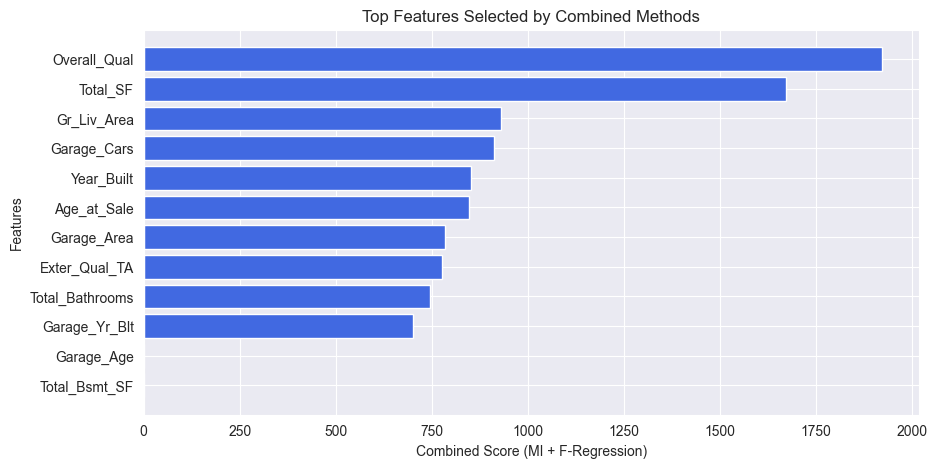

            Feature  MI_Score      F_Score  Total_Score
7      Overall_Qual  0.637576  1920.632856  1921.270432
10         Total_SF  0.620057  1671.941934  1672.561992
6       Gr_Liv_Area  0.468851   929.325621   929.794472
4       Garage_Cars  0.000000   912.525862   912.525862
11       Year_Built  0.556731   851.410533   851.967264
0       Age_at_Sale  0.507392   845.148314   845.655706
3       Garage_Area  0.495496   784.251215   784.746711
1     Exter_Qual_TA  0.000000   776.501941   776.501941
8   Total_Bathrooms  0.433046   745.061914   745.494960
5     Garage_Yr_Blt  0.444004   700.108148   700.552152
2        Garage_Age  0.434671     0.000000     0.434671
9     Total_Bsmt_SF  0.433858     0.000000     0.433858


In [7]:
# Function to compute mutual information
def compute_mutual_information(df, target_column, top_n=None):
    """
    Compute mutual information between all features and the target column.

    :param df: Pandas DataFrame containing the dataset.
    :param target_column: Name of the target column.
    :param top_n: Number of top features to return (optional).
    :return: DataFrame with feature names and their mutual information scores.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Convert categorical features to numerical
    X = pd.get_dummies(X, drop_first=True)

    # Compute mutual information
    mi_scores = mutual_info_regression(X, y)

    # Create a DataFrame with feature names and their scores
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})

    # Sort features by mutual information score
    mi_df = mi_df.sort_values(by="MI_Score", ascending=False)

    if top_n:
        mi_df = mi_df.head(top_n)

    return mi_df

# Function for feature selection using F-Regression
def compute_f_regression(df, target_column, top_n):
    """
    Compute F-Regression scores and select top features.

    :param df: Pandas DataFrame containing the dataset.
    :param target_column: Name of the target column.
    :param top_n: Number of top features to return.
    :return: DataFrame with feature names and their F-Regression scores.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X = pd.get_dummies(X, drop_first=True)

    selector = SelectKBest(score_func=f_regression, k=top_n)
    selector.fit(X, y)

    selected_features = X.columns[selector.get_support()]
    scores = selector.scores_[selector.get_support()]

    f_reg_df = pd.DataFrame({'Feature': selected_features, 'F_Score': scores})
    f_reg_df = f_reg_df.sort_values(by='F_Score', ascending=False)

    return f_reg_df

# Function to merge feature selection results
def merge_feature_selection(df, target_column, top_n=10):
    """
    Combines Mutual Information and F-Regression results.

    :param df: Pandas DataFrame containing the dataset.
    :param target_column: Name of the target column.
    :param top_n: Number of top features to return.
    :return: DataFrame with combined feature importance scores.
    """
    mi_df = compute_mutual_information(df, target_column, top_n)
    f_reg_df = compute_f_regression(df, target_column, top_n)

    merged_df = pd.merge(mi_df, f_reg_df, on='Feature', how='outer')
    merged_df = merged_df.fillna(0)
    merged_df['Total_Score'] = merged_df['MI_Score'] + merged_df['F_Score']

    merged_df = merged_df.sort_values(by='Total_Score', ascending=False)

    # Plot the scores
    plt.figure(figsize=(10, 5))
    plt.barh(merged_df['Feature'], merged_df['Total_Score'], color='royalblue')
    plt.xlabel("Combined Score (MI + F-Regression)")
    plt.ylabel("Features")
    plt.title("Top Features Selected by Combined Methods")
    plt.gca().invert_yaxis()
    plt.show()

    return merged_df

# Compute and display merged feature selection results
top_features = merge_feature_selection(df_engineered, target_column='SalePrice', top_n=10)
print(top_features)


## PCA components: now in the last following scripts we'll create some features based on PCA and then we'll compute the negative mean squared error (NMSE) to see if this algorithm is efficient or not.

In [8]:
# Define target column
target_column = "SalePrice"

# Separate features and target
X = df_engineered.drop(columns=[target_column])
y = df_engineered[target_column]

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

def select_top_features_mi(X, y, top_n=10):
    """
    Selects the top N features based on mutual information scores.

    :param X: Feature matrix (DataFrame)
    :param y: Target variable (Series)
    :param top_n: Number of top features to select
    :return: DataFrame containing the selected top features
    """
    mi_scores = mutual_info_regression(X, y)
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
    mi_df = mi_df.sort_values(by="MI_Score", ascending=False)

    # Select the top N features
    top_features = mi_df.head(top_n)["Feature"].tolist()
    return X[top_features]

def apply_pca(X, standardize=True, variance_threshold=0.95):
    """
    Applies PCA to reduce dimensions while preserving the given variance threshold.

    :param X: Feature matrix (DataFrame)
    :param standardize: Whether to standardize the data before PCA
    :param variance_threshold: Minimum total variance to preserve
    :return: PCA model, reduced DataFrame with the original indices, and loadings
    """
    # Standardize data if required
    if standardize:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.values

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Convert to DataFrame and keep original indices
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names, index=X.index)  # Fix index alignment

    # Determine the number of components to keep
    explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
    n_components = (explained_variance_ratio >= variance_threshold).argmax() + 1

    # Keep only the required principal components
    X_pca = X_pca.iloc[:, :n_components]
    print(f"\nSelected {n_components} principal components to preserve {variance_threshold*100}% variance.")

    # Loadings matrix
    loadings = pd.DataFrame(
        pca.components_[:n_components].T,  # Keep only selected components
        columns=[f"PC{i+1}" for i in range(n_components)],  # Principal components
        index=X.columns,  # Original feature names
    )

    return pca, X_pca, loadings

# Select top 10 features based on mutual information
X_selected = select_top_features_mi(X, y, top_n=15)

# Apply PCA only on the selected top 10 features
pca_model, X_pca, loadings = apply_pca(X_selected, standardize=True, variance_threshold=0.95)

# Merge PCA-transformed features with the full original dataset
final_df = df_engineered.join(X_pca)  # Keep all original features and add PCA components

# Show explained variance of selected components
explained_variance = pca_model.explained_variance_ratio_[:X_pca.shape[1]]
print("\nExplained Variance of Selected Components:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")


Selected 7 principal components to preserve 95.0% variance.

Explained Variance of Selected Components:
PC1: 0.6236
PC2: 0.1252
PC3: 0.0784
PC4: 0.0479
PC5: 0.0333
PC6: 0.0252
PC7: 0.0214


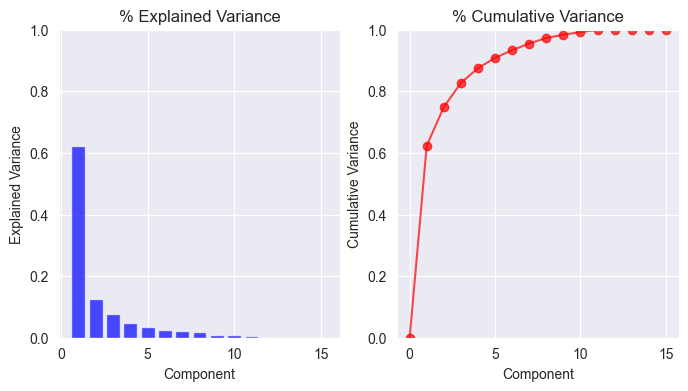


📊 RMSLE Score: 0.0121


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def plot_variance(pca, width=8, dpi=100):
    """
    Plots the explained variance and cumulative variance for PCA components.

    :param pca: Fitted PCA model
    :param width: Figure width
    :param dpi: Figure DPI
    :return: Matplotlib Axes for visualization
    """
    # Create figure
    fig, axs = plt.subplots(1, 2, figsize=(width, 4), dpi=dpi)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr, color="blue", alpha=0.7)
    axs[0].set(
        xlabel="Component",
        ylabel="Explained Variance",
        title="% Explained Variance",
        ylim=(0.0, 1.0),
    )

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-", color="red", alpha=0.7)
    axs[1].set(
        xlabel="Component",
        ylabel="Cumulative Variance",
        title="% Cumulative Variance",
        ylim=(0.0, 1.0),
    )

    # Display plots
    plt.show()

def score_dataset(X, y, model=XGBRegressor()):
    """
    Computes the Negative Mean Squared Log Error (RMSLE) score.

    :param X: Feature matrix
    :param y: Target variable
    :param model: Regression model (default: XGBRegressor)
    :return: RMSLE score
    """
    # Label encoding for categorical variables
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()

    # Perform cross-validation
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error"
    )

    # Convert to RMSLE
    score = -1 * score.mean()
    score = np.sqrt(score)

    return score

# Plot explained variance
plot_variance(pca_model)

# Compute and display model score
X = final_df.copy()
X = X.drop(columns=[target_column])
rmsle_score = score_dataset(final_df, y)
print(f"\n📊 RMSLE Score: {rmsle_score:.4f}")


## When is Feature Engineering a “Nice to Have” vs. a “Must Have”?

### Feature Engineering as a "Nice to Have" Option:
Feature engineering is beneficial but **not always essential** in cases where:
- **Pre-trained models perform well**: If a dataset has been used extensively in research or competitions, pre-built models might already extract useful patterns.
- **Deep learning models are used**: Modern deep learning architectures (e.g., CNNs for images, transformers for NLP) can **automatically extract** high-level features.
- **High-quality structured data is available**: When datasets have minimal noise, well-defined columns, and strong correlations with the target variable, additional feature engineering may yield only **marginal improvements**.
- **Computational cost is a concern**: Feature engineering can be time-consuming, and in some cases, the performance boost **doesn’t justify the extra complexity**.

### Feature Engineering as a “Must Have”:
Feature engineering is essential when:
- **Raw data lacks clear patterns**: Many real-world datasets (e.g., time series, medical records) require domain-specific transformations to extract meaningful insights.
- **Machine learning models struggle with performance**: If basic models (linear regression, decision trees) underperform, feature engineering can **enhance interpretability and predictive power**.
- **Data contains categorical variables**: Many algorithms don’t work well with categorical data; encoding techniques (e.g., one-hot, target encoding) are necessary.
- **Data is noisy or imbalanced**: Feature engineering helps with handling missing values, normalizing scales, and creating meaningful interactions between variables.
- **Small datasets**: When data is limited, creating **new informative features** can help models learn better without needing vast amounts of training data.
- **Business-driven insights matter**: In fields like finance, healthcare, and marketing, domain experts often define critical features that improve decision-making.

### Conclusion:
Feature engineering is **always beneficial** but **not always necessary**. It is a **“nice to have”** when pre-built models and high-quality data already exist, but it becomes a **“must-have”** when working with raw, complex, or noisy datasets where additional feature extraction significantly boosts performance.
